In [1]:
#!nvidia-smi

In [2]:
# For this project, we will be using the Fruits 360 dataset from Kaggle.
# We shall use Kaggle API to get the dataset from Kaggle

In [3]:
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 12.8 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=a701469166111b7d5cbc34c339e4bdbe4d31312f5d72d5315ab6c4b34eb53cac
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [4]:
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/moltean/fruits/fruits-360_dataset/fruits-360")

Skipping, found downloaded files in "./fruits" (use force=True to force download)


In [6]:
!unzip -q "/content/FruitsData.zip"

unzip:  cannot find or open /content/FruitsData.zip, /content/FruitsData.zip.zip or /content/FruitsData.zip.ZIP.


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3

tf.random.set_seed(4)

In [8]:
train_path = Path("fruits/fruits-360_dataset/fruits-360/Training")
test_path = Path("fruits/fruits-360_dataset/fruits-360/Test")

In [9]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x:str(x), train_image_paths))
train_image_paths[:10]

['fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_247_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/288_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/305_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/0_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_253_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_204_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_94_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_201_100.jpg']

In [10]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x:str(x), train_image_paths))
train_image_paths[:10]

['fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_247_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/288_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/305_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/0_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_253_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_204_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_94_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_201_100.jpg']

In [11]:
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x: get_label(x), train_image_paths))

train_image_labels[100:110]

['Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate']

In [12]:
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
train_image_labels[:10]

array([105, 105, 105, 105, 105, 105, 105, 105, 105, 105])

In [13]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)
train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(train_image_paths,train_image_labels)

In [15]:
Train_paths[:10], Train_labels[:10]

(['fruits/fruits-360_dataset/fruits-360/Training/Tomato 1/r2_170_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Potato Red Washed/34_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Melon Piel de Sapo/r2_191_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Nectarine/136_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Physalis with Husk/r_59_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Onion Red/r2_91_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Rambutan/211_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Tomato Heart/r_241_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/283_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Hazelnut/r_274_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.,

In [16]:
# Data Augmentation

In [17]:
#Function to read image jpeg file and return Image tensor and label for the same

In [18]:
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [19]:
# Define Augmentation

In [20]:
IMG_SIZE = 224
BATCH_SIZE = 32

# Basic Transformation for Resize
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)                                                            
])

#Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")                                         ,
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3, -0.2))
])

2022-03-28 11:46:59.727424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 11:47:00.039144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 11:47:00.039709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 11:47:00.041631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 11:47:00.042104: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

In [21]:
# Load and Convert Image files to Tensors

AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train=True):
  #Convert Paths and Labels to TF tensors
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  #Create dataset object for images and labels
  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  # Zip the images and labels
  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
  

  #Apply load function to all the images and labels
  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  #For Training dataset, apply Augmentation, for Validation, only Repeat

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = AUTOTUNE)
  
  dataset = dataset.repeat()

  return dataset


In [22]:
#Create Training dataset and Validate the same

%time train_dataset = get_dataset(Train_paths , Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)


CPU times: user 602 ms, sys: 40.7 ms, total: 642 ms
Wall time: 651 ms
(32, 224, 224, 3)
(32, 131)


Grape White 4


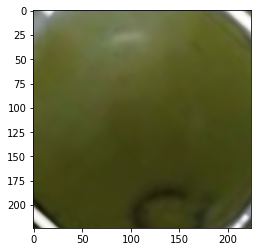

In [23]:
plt.imshow((image[0].numpy()/255).reshape(224,224,3))
print(Le.inverse_transform(np.argmax(label, axis=1))[0])

CPU times: user 99.6 ms, sys: 374 µs, total: 100 ms
Wall time: 99.1 ms
(32, 224, 224, 3)
(32, 131)
Tangelo


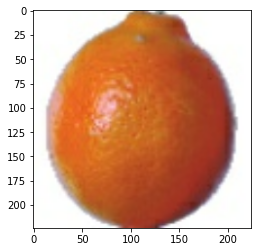

In [24]:
#Create Training dataset and Validate the same

%time val_dataset = get_dataset(Train_paths , Train_labels, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

plt.imshow((image[0].numpy()/255).reshape(224,224,3))
print(Le.inverse_transform(np.argmax(label, axis=1))[0])

In [25]:
backbone = InceptionV3(
    input_shape=(224,224,3),
    include_top = False
)

Model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation = 'softmax')

])

Model.summary()

87924736/87910968 [==============================] - 4s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 22,071,203
Trainable params: 22,036,771
Non-trainable params: 34,432
_________________________________________________________________


In [26]:
#Compile the Model
Model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'Recall')]
)

In [27]:
#Train the Model

history = Model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 1,
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

2022-03-28 11:47:24.756347: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


1586/1586 [==============================] - 823s 504ms/step - loss: 0.5534 - accuracy: 0.8480 - precision: 0.9192 - Recall: 0.8020 - val_loss: 2.1930 - val_accuracy: 0.5353 - val_precision: 0.5778 - val_Recall: 0.5019


In [28]:
#Turn off the backbone network(ResNet)
Model.layers[0].trainable = False

In [29]:
#Define Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("Inception Best Weights.h5", verbose = 1, save_best_only = True, save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [30]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 22,071,203
Trainable params: 268,419
Non-trainable params: 21,802,784
_________________________________________________________________


In [31]:
#Train the Model without the backbone layer

#Train the Model

history = Model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.9616 - precision: 0.9674 - Recall: 0.9557
Epoch 00001: val_loss improved from inf to 1.37081, saving model to Inception Best Weights.h5
1586/1586 [==============================] - 796s 501ms/step - loss: 0.1263 - accuracy: 0.9616 - precision: 0.9674 - Recall: 0.9557 - val_loss: 1.3708 - val_accuracy: 0.7045 - val_precision: 0.7320 - val_Recall: 0.6856
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0852 - accuracy: 0.9752 - precision: 0.9781 - Recall: 0.9723
Epoch 00002: val_loss improved from 1.37081 to 0.63920, saving model to Inception Best Weights.h5
1586/1586 [==============================] - 799s 502ms/step - loss: 0.0852 - accuracy: 0.9752 - precision: 0.9781 - Recall: 0.9723 - val_loss: 0.6392 - val_accuracy: 0.8284 - val_precision: 0.8494 - val_Recall: 0.8112
Epoch 3/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9787 - pre